<a href="https://colab.research.google.com/github/GHROTH-L/-ai-ml-training-/blob/main/MILK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns #畫圖使用
%matplotlib inline

#將dataframe 上傳與下載下來
from google.colab import files

#計算日期相減
from dateutil.relativedelta import relativedelta
import datetime

'''
資料選自
https://aidea-web.tw/topic/fcc338da-e7ec-4d9e-a860-5dcdd85ba52b

外部資料
https://e-service.cwb.gov.tw/HistoryDataQuery/
'''

'\n資料選自\nhttps://aidea-web.tw/topic/fcc338da-e7ec-4d9e-a860-5dcdd85ba52b\n\n外部資料\nhttps://e-service.cwb.gov.tw/HistoryDataQuery/\n'

In [3]:
uploaded = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()
uploaded4 = files.upload()
uploaded5 = files.upload()


Saving spec.csv to spec.csv


Saving report.csv to report.csv


Saving breed.csv to breed.csv


Saving birth.csv to birth.csv


Saving weather.csv to weather.csv


In [5]:
spec = pd.read_csv(io.BytesIO(uploaded['spec.csv']))
report = pd.read_csv(io.BytesIO(uploaded2['report.csv']))
breed = pd.read_csv(io.BytesIO(uploaded3['breed.csv']))
birth = pd.read_csv(io.BytesIO(uploaded4['birth.csv']))
weather = pd.read_csv(io.BytesIO(uploaded5['weather.csv']),encoding='utf-8')

<ipython-input-5-d1de589e9dda>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  report = pd.read_csv(io.BytesIO(uploaded2['report.csv']))


In [6]:
# 製造list
spec_l = ['乳牛編號','狀況類別','狀況代號','狀況日期','備註','登錄日期','酪農場代號']
breed_l =['乳牛編號','配種日期','配種精液','登錄日期','孕檢','配種方式','精液種類','酪農場代號']
birth_l =['乳牛編號','分娩日期','乾乳日期','犢牛編號1','犢牛編號2','母牛體重','登錄日期','計算胎次','胎次','分娩難易度','犢牛體型','犢牛性別','酪農場代號']
report_l = ['ID','資料年度','資料月份','酪農場代號(A:桃園楊梅，B:彰化福興，C:屏東萬丹)','乳牛編號','父親牛精液編號','母親乳牛編號','出生日期','胎次','泌乳天數','乳量',
'最近分娩日期','採樣日期','月齡','檢測日期','最後配種日期','最後配種精液','配種次數','前次分娩日期','第一次配種日期','第一次配種精液'    
]
# 轉換成dic #將key轉為str                        並且從1開始
spec_d = {str(index):value for index , value in enumerate(spec_l, start=1)}
breed_d = {str(index):value for index , value in enumerate(breed_l, start=1)}
birth_d = {str(index):value for index , value in enumerate(birth_l, start=1)}
report_d = {str(index):value for index , value in enumerate(report_l, start=1)}

#更改每個dataframe的欄位名稱
spec = spec.rename(columns=spec_d)
breed  = breed.rename(columns=breed_d)
birth = birth.rename(columns=birth_d)
report = report.rename(columns=report_d)

print(len(breed))
print(len(birth))
print(len(spec))
print(len(report))

21050
3761
4362
37517


#清洗資料

##spec

In [7]:
spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   乳牛編號    4362 non-null   int64 
 1   狀況類別    4362 non-null   object
 2   狀況代號    3749 non-null   object
 3   狀況日期    4362 non-null   object
 4   備註      1197 non-null   object
 5   登錄日期    3104 non-null   object
 6   酪農場代號   4362 non-null   object
dtypes: int64(1), object(6)
memory usage: 238.7+ KB


In [8]:
specc = spec[spec['備註'].notnull()]['備註'].unique()
specc

array(['其他原因', '2種原因以上', '蹄的問題', '其他疾病', '淘汰', '生殖道問題', '代謝疾病', '內寄生蟲',
       '死亡', '10876轉售10826', '10876售10826', '木乃伊', '難產', '腳痛', '感冒',
       '繁殖障礙', '腳斷', '無法站立', '母', '整理牛群資料', '双死-公/母', '整理牛群資料C', ' 母',
       '公/母', '公', '暫停抗生素', '暫停有抗生素', '有抗生素', '初乳', '中毒', '5055'],
      dtype=object)

In [9]:
spec[spec['備註'].isin(specc)]['狀況類別'].unique()
#CD 是有問題

array(['C', 'D'], dtype=object)

In [10]:
spec[spec['備註'].isnull()]['狀況類別'].unique()

array(['N', 'D', 'n', 'C', '1', '2', 'c'], dtype=object)

In [11]:
spec[spec['狀況類別'].isin(['C','D'])]['狀況代號'].unique()

array(['C', 'D', '20', '30', '32', '81', '0', '74', '52', '31', '3', '12',
       '29', '5', '57', '42', '54', '50', '27', '38', '46', '39', '53',
       '40', '56', '2', '25', '11', '21', '26', '36', '43', 'C02', '1',
       '62', '55', '41', '24', '10', '47', '92', '48', '14', '61', '51',
       '80', '45', '60', '13', '4', '28', '18', '22'], dtype=object)

In [12]:
#所所以'n' = N c = c 12>指派到D
spec.loc[(spec["狀況類別"] == 'n'),["狀況類別"]] = 'N'
spec.loc[(spec["狀況類別"] == 'c'),["狀況類別"]] = 'C'
spec.loc[(spec["狀況類別"] == '2'),["狀況類別"]] = 'C'
spec.loc[(spec["狀況類別"] == '1'),["狀況類別"]] = 'C'

In [13]:
spec.isnull().sum()

乳牛編號        0
狀況類別        0
狀況代號      613
狀況日期        0
備註       3165
登錄日期     1258
酪農場代號       0
dtype: int64

<Axes: xlabel='狀況類別', ylabel='count'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 29376 (\N{CJK UNIFIED IDEOGRAPH-72C0}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 27841 (\N{CJK UNIFIED IDEOGRAPH-6CC1}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 29376 (\N{CJK UNIFIED IDEOGRAPH-72C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 27841 (\N{CJ

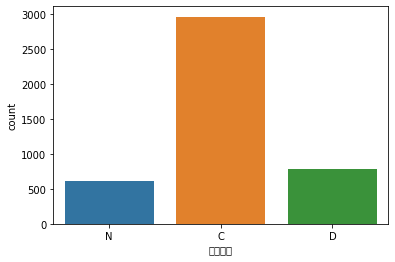

In [14]:
sns.countplot(data=spec, x='狀況類別')

In [15]:
#只挑選 '乳牛編號','狀況類別','狀況日期','酪農場代號'
spec2 = spec.loc[:,['乳牛編號','狀況類別','狀況日期','酪農場代號']]
# 將狀況日期 轉為date形式

In [16]:
spec

,乳牛編號,狀況類別,狀況代號,狀況日期,備註,登錄日期,酪農場代號
0,5022341,N,NaN,1999/8/24 00:00,NaN,NaN,A
1,5022362,N,NaN,1999/8/24 00:00,NaN,NaN,A
2,5022365,N,NaN,1999/8/24 00:00,NaN,NaN,A
3,5022372,N,NaN,1999/8/24 00:00,NaN,NaN,A
4,5022373,N,NaN,1999/8/24 00:00,NaN,NaN,A
...,...,...,...,...,...,...,...
4357,3051593,N,NaN,2017/6/6 00:00,NaN,2017/6/7 00:00,A
4358,1051842,C,12,2017/6/22 00:00,NaN,2017/7/6 00:00,A
4359,2052033,C,31,2017/6/22 00:00,NaN,2017/7/6 00:00,A
4360,2052019,C,12,2018/5/9 00:00,NaN,2018/5/11 00:00,A


In [17]:
'''
在上面的代碼中，我們使用 format='%Y-%m' 指定了日期時間字串的格式，以解析日期時間字串中的年和月部分。然後，我們使用 dt.strftime('%Y-%m') 函數將 datetime 對象轉換為格式化字串，以便將其存儲在新的 year_month 欄位中。

需要注意的是，如果指定的日期時間字串不符合指定的格式，則 pd.to_datetime() 函數將返回 NaT（Not a Time）值。在上面的代碼中，我們使用了 errors='coerce' 參數，以便將解析失敗的部分設置為 NaT 值。
'''
spec2['狀況日期']= pd.to_datetime(spec['狀況日期'], format='%Y-%m', errors='coerce')
spec2

,乳牛編號,狀況類別,狀況日期,酪農場代號
0,5022341,N,1999-08-24,A
1,5022362,N,1999-08-24,A
2,5022365,N,1999-08-24,A
3,5022372,N,1999-08-24,A
4,5022373,N,1999-08-24,A
...,...,...,...,...
4357,3051593,N,2017-06-06,A
4358,1051842,C,2017-06-22,A
4359,2052033,C,2017-06-22,A
4360,2052019,C,2018-05-09,A


In [18]:
spec2.isnull().sum()

乳牛編號     0
狀況類別     0
狀況日期     0
酪農場代號    0
dtype: int64

##birth

In [19]:
birth.isnull().sum() 

乳牛編號        0
分娩日期        0
乾乳日期     1637
犢牛編號1    2907
犢牛編號2    3753
母牛體重     3051
登錄日期        0
計算胎次        0
胎次          0
分娩難易度     903
犢牛體型     3408
犢牛性別     2802
酪農場代號       0
dtype: int64

In [20]:
birth['計算胎次'].unique()

array([ True])

In [21]:
 #取乳牛編號、分娩日期、胎次、農場代號  母牛體重的數量太少了 只有七百多筆
birth2= birth.loc[:,['乳牛編號','分娩日期','胎次','酪農場代號','母牛體重']]
 #改變分娩時間的日期

birth2['分娩日期'] = pd.to_datetime(birth2['分娩日期'], format='%Y-%m', errors='coerce').dt.strftime('%Y-%m') #因為在report裡面只月份，所以轉成月份的object
birth2['母牛體重']=birth2['母牛體重'].fillna(birth2['母牛體重'].median())
birth2

,乳牛編號,分娩日期,胎次,酪農場代號,母牛體重
0,87121677,2013-01,2,B,570.0
1,96126940,2013-01,2,B,522.0
2,95181708,2013-01,5,C,670.0
3,97127665,2013-01,3,B,570.0
4,97182634,2013-01,4,C,630.0
...,...,...,...,...,...
3756,5184341,2019-07,2,C,560.0
3757,5184348,2019-07,2,C,580.0
3758,97182634,2019-07,9,C,730.0
3759,99183190,2019-07,7,C,690.0


In [22]:
birth2[birth2['乳牛編號']==52613]

,乳牛編號,分娩日期,胎次,酪農場代號,母牛體重
248,52613,2013-06,1,A,570.0
624,52613,2014-07,2,A,570.0
1540,52613,2016-04,3,A,570.0


##breed

In [23]:
breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21050 entries, 0 to 21049
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   乳牛編號    21050 non-null  int64 
 1   配種日期    21050 non-null  object
 2   配種精液    21050 non-null  object
 3   登錄日期    21050 non-null  object
 4   孕檢      21050 non-null  int64 
 5   配種方式    213 non-null    object
 6   精液種類    228 non-null    object
 7   酪農場代號   21050 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.3+ MB


In [24]:
breed.isnull().sum()
#孕檢為0

乳牛編號         0
配種日期         0
配種精液         0
登錄日期         0
孕檢           0
配種方式     20837
精液種類     20822
酪農場代號        0
dtype: int64

In [25]:
breed2 = breed.loc[:,['乳牛編號','配種日期','配種精液','酪農場代號']]
 #更改配種日期的時間
breed2['配種日期'] = pd.to_datetime(breed2['配種日期'], format='%Y-%m', errors='coerce')
breed2

,乳牛編號,配種日期,配種精液,酪農場代號
0,11361,2005-09-02,1H5506,A
1,11469,2000-01-17,72H896,A
2,11930,2000-05-12,9H2164,A
3,11930,2000-05-26,1H2993,A
4,11930,2000-07-04,14H2403,A
...,...,...,...,...
21045,6187429,2019-07-17,001HO12901,C
21046,6187431,2019-07-24,001HO12901,C
21047,6187441,2019-07-14,001HO12901,C
21048,6187442,2019-07-17,001HO12901,C


In [26]:
breed[breed['乳牛編號']==52613]

,乳牛編號,配種日期,配種精液,登錄日期,孕檢,配種方式,精液種類,酪農場代號
10868,52613,2012/9/26 00:00,501H9015,2012/10/22 00:00,0,NaN,NaN,A
11906,52613,2013/9/23 00:00,7H9346,2013/10/11 00:00,0,NaN,NaN,A
13502,52613,2014/12/1 00:00,7H10272,2014/12/12 00:00,0,NaN,NaN,A
13596,52613,2014/12/23 00:00,7H10272,2015/1/13 00:00,0,NaN,NaN,A
13901,52613,2015/4/8 00:00,7H11581,2015/4/16 00:00,0,NaN,NaN,A
14005,52613,2015/4/18 00:00,7H11585,2015/5/15 00:00,0,NaN,NaN,A
14374,52613,2015/7/10 00:00,501H10445,2015/8/12 00:00,0,NaN,NaN,A
15913,52613,2016/9/1 00:00,200HO00402,2016/9/8 00:00,0,NaN,NaN,A


#weather
這個是從氣象局抓來的資料，並且是以月平均溫度、雨量為數據

In [27]:
weather = weather.rename(columns = {'farm':'酪農場代號'})

In [28]:
# 將 'year' 和 'month' 兩欄合併為 'date' 欄位，需要先轉為字串
#中間要加一個小槓槓
weather['date'] = pd.to_datetime(weather['year'].astype(str) +'-'+ weather['month'].astype(str), format='%Y-%m', errors='coerce').dt.strftime('%Y-%m')

In [29]:
weather = weather[['temp','rain','酪農場代號','date']]
weather

,temp,rain,酪農場代號,date
0,15.683333,136.583333,A,2013-01
1,15.000000,116.250000,A,2013-02
2,17.400000,203.000000,A,2013-03
3,21.916667,120.250000,A,2013-04
4,24.800000,262.500000,A,2013-05
...,...,...,...,...
247,28.400000,772.000000,C,2019-08
248,28.200000,142.000000,C,2019-09
249,27.200000,68.500000,C,2019-10
250,24.600000,2.000000,C,2019-11


#report
要先區分出test資料

In [30]:
report = report.rename(columns={'酪農場代號(A:桃園楊梅，B:彰化福興，C:屏東萬丹)' : '酪農場代號'})

In [31]:
#將資料月份轉完日期形式
report['date'] = pd.to_datetime(report['資料年度'].astype(str) + '-' + report['資料月份'].astype(str), format='%Y-%m').dt.strftime('%Y-%m')
report['檢測日期'] = pd.to_datetime(report['檢測日期'], format='%Y-%m')
report['分娩日期'] = pd.to_datetime(report['最近分娩日期'], format='%Y-%m').dt.strftime('%Y-%m') #因為在report中都是用月份來計算，所以這裡變成object才能對應
report['最近分娩日期'] = pd.to_datetime(report['最近分娩日期'], format='%Y-%m')

In [32]:
#date - 最近分娩日期  >距今分娩時間
report['距今分娩'] = (pd.to_datetime(report['檢測日期']) - pd.to_datetime(report['最近分娩日期'])).astype('timedelta64[D]')

In [33]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37517 entries, 0 to 37516
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ID       37517 non-null  int64         
 1   資料年度     37517 non-null  int64         
 2   資料月份     37517 non-null  int64         
 3   酪農場代號    37517 non-null  object        
 4   乳牛編號     37517 non-null  int64         
 5   父親牛精液編號  36641 non-null  object        
 6   母親乳牛編號   33933 non-null  object        
 7   出生日期     37517 non-null  object        
 8   胎次       37517 non-null  int64         
 9   泌乳天數     37516 non-null  float64       
 10  乳量       33254 non-null  float64       
 11  最近分娩日期   37516 non-null  datetime64[ns]
 12  採樣日期     37517 non-null  object        
 13  月齡       37517 non-null  int64         
 14  檢測日期     37517 non-null  datetime64[ns]
 15  最後配種日期   35981 non-null  object        
 16  最後配種精液   35981 non-null  object        
 17  配種次數     37517 non-null  int64 

In [34]:
report.isnull().sum()

ID             0
資料年度           0
資料月份           0
酪農場代號          0
乳牛編號           0
父親牛精液編號      876
母親乳牛編號      3584
出生日期           0
胎次             0
泌乳天數           1
乳量          4263
最近分娩日期         1
採樣日期           0
月齡             0
檢測日期           0
最後配種日期      1536
最後配種精液      1536
配種次數           0
前次分娩日期     17420
第一次配種日期     1431
第一次配種精液     1431
date           0
分娩日期           1
距今分娩           1
dtype: int64

#合併資料

In [35]:
reportx = report.loc[:,['ID','date','檢測日期','酪農場代號','乳牛編號','泌乳天數','胎次','乳量','月齡','距今分娩','分娩日期']]

In [36]:
print(len(breed2))
print(len(birth2))
print(len(spec2))
print(len(reportx))
print(len(weather))

21050
3761
4362
37517
252


In [37]:
reportx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37517 entries, 0 to 37516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      37517 non-null  int64         
 1   date    37517 non-null  object        
 2   檢測日期    37517 non-null  datetime64[ns]
 3   酪農場代號   37517 non-null  object        
 4   乳牛編號    37517 non-null  int64         
 5   泌乳天數    37516 non-null  float64       
 6   胎次      37517 non-null  int64         
 7   乳量      33254 non-null  float64       
 8   月齡      37517 non-null  int64         
 9   距今分娩    37516 non-null  float64       
 10  分娩日期    37516 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 3.1+ MB


In [38]:
#融合狀況類別
x = pd.merge(reportx,spec2 ,on=['乳牛編號','酪農場代號'],how='left')
x['time'] = (x['檢測日期'] - x['狀況日期']).dt.days
x['狀況類別']=np.where(((x['time'] < 32) & (x['time'] > 0)), x['狀況類別'], np.nan )
x = x.drop(['time','狀況日期'], axis = 1)
x.drop_duplicates(subset=['ID','date','檢測日期','酪農場代號','乳牛編號','泌乳天數','胎次','乳量','月齡','距今分娩','狀況類別'], keep='first',inplace=True)
x = x.groupby(['乳牛編號', '檢測日期']).tail(1) #刪除同日期檢測，但是不同日期發病的，並且取最後一筆(就是最新的)
x

,ID,date,檢測日期,酪農場代號,乳牛編號,泌乳天數,胎次,乳量,月齡,距今分娩,分娩日期,狀況類別
0,1,2013-03,2013-03-21,A,52612,78.0,1,29.4,26,79.0,2013-01,NaN
3,2,2013-04,2013-04-19,A,52612,107.0,1,27.8,27,108.0,2013-01,NaN
6,3,2013-05,2013-05-22,A,52612,140.0,1,9.0,28,141.0,2013-01,NaN
9,4,2013-06,2013-06-26,A,52612,175.0,1,13.0,29,176.0,2013-01,NaN
12,5,2013-07,2013-07-31,A,52612,210.0,1,13.2,30,211.0,2013-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
53638,37513,2014-01,2014-01-21,C,93184912,12.0,8,20.0,130,13.0,2014-01,NaN
53639,37514,2014-05,2014-05-26,C,93184912,137.0,8,21.0,134,138.0,2014-01,NaN
53640,37515,2014-06,2014-06-26,C,93184912,168.0,8,19.0,135,169.0,2014-01,NaN
53641,37516,2014-07,2014-07-25,C,93184912,197.0,8,12.0,136,198.0,2014-01,NaN


In [39]:
#融合weather
x2 = pd.merge(x,weather, on=['酪農場代號','date'],how='left')
x2

,ID,date,檢測日期,酪農場代號,乳牛編號,泌乳天數,胎次,乳量,月齡,距今分娩,分娩日期,狀況類別,temp,rain
0,1,2013-03,2013-03-21,A,52612,78.0,1,29.4,26,79.0,2013-01,NaN,17.400000,203.000000
1,2,2013-04,2013-04-19,A,52612,107.0,1,27.8,27,108.0,2013-01,NaN,21.916667,120.250000
2,3,2013-05,2013-05-22,A,52612,140.0,1,9.0,28,141.0,2013-01,NaN,24.800000,262.500000
3,4,2013-06,2013-06-26,A,52612,175.0,1,13.0,29,176.0,2013-01,NaN,27.900000,292.083333
4,5,2013-07,2013-07-31,A,52612,210.0,1,13.2,30,211.0,2013-01,NaN,29.066667,113.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37512,37513,2014-01,2014-01-21,C,93184912,12.0,8,20.0,130,13.0,2014-01,NaN,18.700000,0.000000
37513,37514,2014-05,2014-05-26,C,93184912,137.0,8,21.0,134,138.0,2014-01,NaN,27.600000,165.000000
37514,37515,2014-06,2014-06-26,C,93184912,168.0,8,19.0,135,169.0,2014-01,NaN,28.900000,320.500000
37515,37516,2014-07,2014-07-25,C,93184912,197.0,8,12.0,136,198.0,2014-01,NaN,29.900000,368.500000


In [154]:
#融合乳牛重量
y = pd.merge(x2,birth2 ,on=['乳牛編號','酪農場代號','胎次','分娩日期'],how='left')
y.drop_duplicates(subset=['ID','date','檢測日期','酪農場代號','乳牛編號','泌乳天數','胎次','乳量','月齡','距今分娩','分娩日期','狀況類別','母牛體重'], keep='first',inplace=True)
#這裡會有問題，在birth資料中 有相差幾天，同一胎次，但是體重不同的狀況，但不影響2019的資料就算了 
#y[y['檢測日期'].dt.year==2019] 都是4263
y

,ID,date,檢測日期,酪農場代號,乳牛編號,泌乳天數,胎次,乳量,月齡,距今分娩,分娩日期,狀況類別,temp,rain,母牛體重
0,1,2013-03,2013-03-21,A,52612,78.0,1,29.4,26,79.0,2013-01,NaN,17.400000,203.000000,570.0
1,2,2013-04,2013-04-19,A,52612,107.0,1,27.8,27,108.0,2013-01,NaN,21.916667,120.250000,570.0
2,3,2013-05,2013-05-22,A,52612,140.0,1,9.0,28,141.0,2013-01,NaN,24.800000,262.500000,570.0
3,4,2013-06,2013-06-26,A,52612,175.0,1,13.0,29,176.0,2013-01,NaN,27.900000,292.083333,570.0
4,5,2013-07,2013-07-31,A,52612,210.0,1,13.2,30,211.0,2013-01,NaN,29.066667,113.833333,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37558,37513,2014-01,2014-01-21,C,93184912,12.0,8,20.0,130,13.0,2014-01,NaN,18.700000,0.000000,725.0
37559,37514,2014-05,2014-05-26,C,93184912,137.0,8,21.0,134,138.0,2014-01,NaN,27.600000,165.000000,725.0
37560,37515,2014-06,2014-06-26,C,93184912,168.0,8,19.0,135,169.0,2014-01,NaN,28.900000,320.500000,725.0
37561,37516,2014-07,2014-07-25,C,93184912,197.0,8,12.0,136,198.0,2014-01,NaN,29.900000,368.500000,725.0


In [155]:
#將狀況類別 的nan 轉為 數字型態
y['狀況類別']=y['狀況類別'].fillna(0)
#所以'n' = N c = c 12>指派到D
s = pd.get_dummies(y['狀況類別'])

y['母牛體重']=y['母牛體重'].fillna(y['母牛體重'].mean())
#酪農場代號
y.loc[(y['酪農場代號'] == 'A'),['酪農場代號']] = 'a'
y.loc[(y['酪農場代號'] == 'B'),['酪農場代號']] = 'b'
y.loc[(y['酪農場代號'] == 'C'),['酪農場代號']] = 'c'
ss =pd.get_dummies(y['酪農場代號'])
y = y.drop(['酪農場代號','狀況類別'],1)
y = pd.concat([y,s],axis=1)
y = pd.concat([y,ss],axis=1) 
y.isnull().sum()


<ipython-input-155-343a6d4f312c>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  y = y.drop(['酪農場代號','狀況類別'],1)


ID         0
date       0
檢測日期       0
乳牛編號       0
泌乳天數       1
胎次         0
乳量      4263
月齡         0
距今分娩       1
分娩日期       1
temp       0
rain       0
母牛體重       0
0          0
C          0
D          0
N          0
a          0
b          0
c          0
dtype: int64

In [70]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37537 entries, 0 to 37562
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      37537 non-null  int64         
 1   date    37537 non-null  object        
 2   檢測日期    37537 non-null  datetime64[ns]
 3   乳牛編號    37537 non-null  int64         
 4   泌乳天數    37536 non-null  float64       
 5   胎次      37537 non-null  int64         
 6   乳量      33274 non-null  float64       
 7   月齡      37537 non-null  int64         
 8   距今分娩    37536 non-null  float64       
 9   分娩日期    37536 non-null  object        
 10  temp    37537 non-null  float64       
 11  rain    37537 non-null  float64       
 12  母牛體重    37537 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(4), object(2)
memory usage: 4.0+ MB


#分開資料

In [234]:
#測試資料 C 類別  c連續
C=[0,'C','D','N','a','b','c']
test_C = y[(y['檢測日期'].dt.year==2019)&(y['乳量'].isnull())][C].values
test= y[(y['檢測日期'].dt.year==2019)&(y['乳量'].isnull())].drop(['乳量','date','檢測日期','分娩日期','乳牛編號',0,'C','D','N','a','b','c'],axis=1)
test_vc = test.drop('ID',axis=1).values #捨棄id 之後再補上來

In [235]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4263 entries, 479 to 37530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4263 non-null   int64  
 1   泌乳天數    4263 non-null   float64
 2   胎次      4263 non-null   int64  
 3   月齡      4263 non-null   int64  
 4   距今分娩    4263 non-null   float64
 5   temp    4263 non-null   float64
 6   rain    4263 non-null   float64
 7   母牛體重    4263 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 299.7 KB


In [236]:
z = y.dropna()
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33273 entries, 0 to 37562
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      33273 non-null  int64         
 1   date    33273 non-null  object        
 2   檢測日期    33273 non-null  datetime64[ns]
 3   乳牛編號    33273 non-null  int64         
 4   泌乳天數    33273 non-null  float64       
 5   胎次      33273 non-null  int64         
 6   乳量      33273 non-null  float64       
 7   月齡      33273 non-null  int64         
 8   距今分娩    33273 non-null  float64       
 9   分娩日期    33273 non-null  object        
 10  temp    33273 non-null  float64       
 11  rain    33273 non-null  float64       
 12  母牛體重    33273 non-null  float64       
 13  0       33273 non-null  uint8         
 14  C       33273 non-null  uint8         
 15  D       33273 non-null  uint8         
 16  N       33273 non-null  uint8         
 17  a       33273 non-null  uint8         
 18  b     

In [237]:
z.describe()

,ID,乳牛編號,泌乳天數,胎次,乳量,月齡,距今分娩,temp,rain,母牛體重,0,C,D,N,a,b,c
count,33273.000000,3.327300e+04,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.000000,33273.00000,33273.000000
mean,18553.430589,2.566648e+07,206.414600,1.955189,23.990792,47.561687,207.828329,24.047679,138.538750,570.938692,0.994320,0.000902,0.001473,0.003306,0.247498,0.58546,0.167042
std,10771.833084,4.095154e+07,150.411569,1.227395,8.741124,19.332587,150.397838,4.867429,195.546255,20.500414,0.075154,0.030014,0.038348,0.057403,0.431565,0.49265,0.373019
min,1.000000,5.261200e+04,1.000000,1.000000,0.000000,0.000000,2.000000,13.800000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,9428.000000,1.123375e+06,89.000000,1.000000,18.000000,33.000000,90.000000,20.000000,16.000000,570.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,18399.000000,3.125319e+06,182.000000,2.000000,23.400000,43.000000,184.000000,24.700000,64.500000,570.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,27842.000000,1.083798e+07,288.000000,2.000000,30.000000,57.000000,289.000000,28.500000,182.500000,570.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
max,37517.000000,9.918321e+07,1789.000000,11.000000,61.000000,160.000000,1790.000000,31.000000,1526.500000,750.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [238]:
C=[0,'C','D','N','a','b','c']
train_xC = z[C].values
train_xc = z.drop(['乳量','date','檢測日期','分娩日期','ID','乳牛編號',0,'C','D','N','a','b','c'],axis=1).values
train_y = z[['乳量']].values

In [239]:
train_xc

array([[ 78.        ,   1.        ,  26.        , ...,  17.4       ,
        203.        , 570.        ],
       [107.        ,   1.        ,  27.        , ...,  21.91666667,
        120.25      , 570.        ],
       [140.        ,   1.        ,  28.        , ...,  24.8       ,
        262.5       , 570.        ],
       ...,
       [168.        ,   8.        , 135.        , ...,  28.9       ,
        320.5       , 725.        ],
       [197.        ,   8.        , 136.        , ...,  29.9       ,
        368.5       , 725.        ],
       [229.        ,   8.        , 137.        , ...,  28.7       ,
        801.5       , 725.        ]])

In [240]:
#標準化
from sklearn import preprocessing
train_xc = preprocessing.scale(train_xc) #這是Z分數標準化
test_vc = preprocessing.scale(test_vc)

In [241]:
#補回類別變項
train_x = np.concatenate([train_xc,train_xC],axis=1)
test_v = np.concatenate([test_vc,test_C],axis=1)

In [242]:
train_x[1]

array([-0.66096042, -0.77823646, -1.06359258, -0.66377171, -0.43781723,
       -0.09352787, -0.04578964,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ])

In [243]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=69)

#訓練機器

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD ,Adam, Adagrad

In [213]:
from keras import backend as K
def rmse(y_pred, y_true):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [216]:
model = Sequential()
model.add(Dense(256, input_dim=14, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss=rmse, optimizer=Adagrad(learning_rate=0.087), 
              metrics=rmse)

In [217]:
model.fit(x_train,y_train,batch_size=64,epochs=5,verbose=1)

Epoch 1/5
364/364 [==============================] - 2s 5ms/step - loss: 7.2930 - rmse: 7.2926
Epoch 2/5
364/364 [==============================] - 2s 4ms/step - loss: 6.5686 - rmse: 6.5685
Epoch 3/5
364/364 [==============================] - 2s 4ms/step - loss: 6.4810 - rmse: 6.4810
Epoch 4/5
364/364 [==============================] - 2s 4ms/step - loss: 6.4091 - rmse: 6.4092
Epoch 5/5
364/364 [==============================] - 2s 6ms/step - loss: 6.3738 - rmse: 6.3738


312/312 [==============================] - 1s 2ms/step


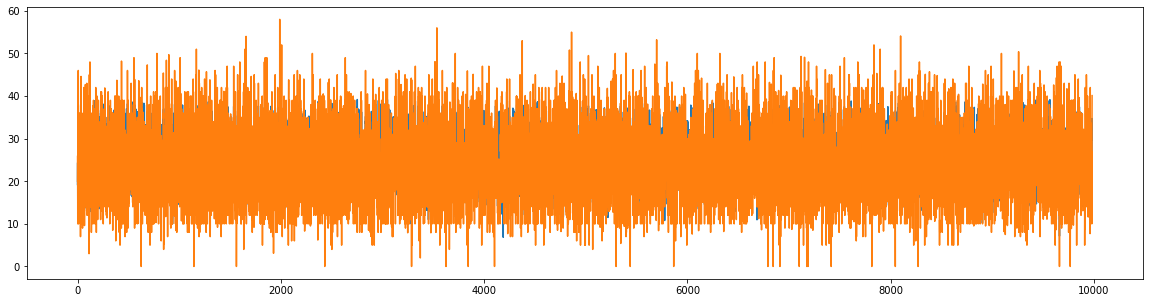

In [244]:
import matplotlib.pyplot as plt
%matplotlib inline

prediction=model.predict(x_test)
plt.figure(figsize=(20,5))
plt.plot(prediction)
plt.plot(y_test)

In [247]:
#將預測繳交
dnn_pred =model.predict(test_v)
dnn_sub = pd.DataFrame({"ID": test['ID'], "1": dnn_pred.reshape(-1).astype(int)})
dnn_sub.to_csv('dnn_sub.csv', encoding = 'utf-8-sig', index = False) 
files.download('dnn_sub.csv')

134/134 [==============================] - 0s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [245]:
dnn_pred =model.predict(test_v)
dnn_sub = pd.DataFrame({"ID": test['ID'], "1": dnn_pred.reshape(-1).astype(int)})
dnn_sub['1'].unique()

134/134 [==============================] - 0s 3ms/step


array([16, 34, 36, 33, 20, 21, 32, 31, 29, 22, 27, 26, 25, 24, 17, 19, 14,
       15, 18, 23, 30, 28, 35,  9, 37, 38, 13, 39, 10, 12, 11,  6])

In [246]:
dnn_sub['1']

479      16
741      34
742      36
743      33
744      33
         ..
37526    19
37527    19
37528    19
37529    19
37530    18
Name: 1, Length: 4263, dtype: int64

#svm

In [248]:
from sklearn import svm
svm = svm.LinearSVR( random_state= 69)

In [249]:
svm.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(random_state=69)

In [250]:
svm.score(x_test,y_test)

0.39288793537525435